TASK 1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [41]:
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0
if y_train.shape[-1] == 10:
    y_train = y_train.argmax(axis=-1)
    y_test = y_test.argmax(axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [42]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


In [45]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8321 - loss: 0.6589 - val_accuracy: 0.9152 - val_loss: 0.3024
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9157 - loss: 0.3031 - val_accuracy: 0.9200 - val_loss: 0.2884
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9191 - loss: 0.2921 - val_accuracy: 0.9244 - val_loss: 0.2799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9227 - loss: 0.2852 - val_accuracy: 0.9255 - val_loss: 0.2760
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9235 - loss: 0.2843 - val_accuracy: 0.9229 - val_loss: 0.2816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2757 - val_accuracy: 0.9269 - val_loss: 0.2750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9262 - loss: 0.2751 - val_accuracy: 0.9264 - val_loss: 0.2788
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9281 - loss: 0.2727 - 

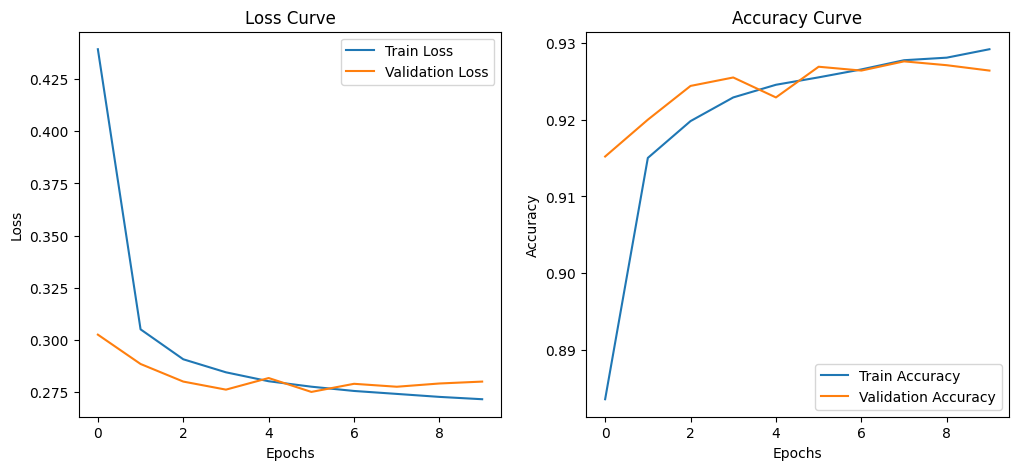

In [46]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

TASK 2

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

In [48]:
(X_train,y_train), (X_test,y_test)= tf.keras.datasets.mnist.load_data()

In [49]:
X_train= X_train.reshape(-1,784)/255.0
X_test = X_test.reshape(-1,784)/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [50]:
def create_model():
  model=Sequential([Dense(10, activation='softmax', input_shape=(784,))])
  model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [51]:
batch_sizes= [1000,2000]
history_rec={}

In [52]:
for  batch_size in batch_sizes:
  print(f'training with batch_size{batch_size}')
  model=create_model()
  history=model.fit(X_train,y_train,epochs=10,batch_size=batch_size,validation_data=(X_test,y_test))
  history_rec[batch_size]=history.history



training with batch_size1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5443 - loss: 1.6650 - val_accuracy: 0.8372 - val_loss: 0.7900
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8398 - loss: 0.7214 - val_accuracy: 0.8787 - val_loss: 0.5027
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.4999 - val_accuracy: 0.8964 - val_loss: 0.4028
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8937 - loss: 0.4032 - val_accuracy: 0.9051 - val_loss: 0.3564
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9007 - loss: 0.3670 - val_accuracy: 0.9105 - val_loss: 0.3321
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9078 - loss: 0.3404 - val_accuracy: 0.9134 - val_loss: 0.3159
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.3260 - val_accuracy: 0.9157 - val_loss: 0.3059
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9101 - loss: 0.3216 - val_accuracy: 0.9175 - val_loss

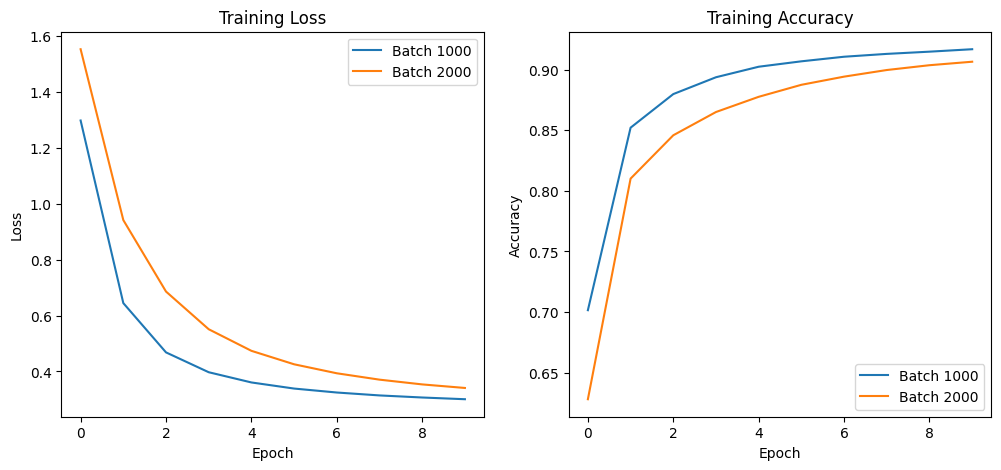

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for batch_size in batch_sizes:
    plt.plot(history_rec[batch_size]['loss'], label=f'Batch {batch_size}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for batch_size in batch_sizes:
    plt.plot(history_rec[batch_size]['accuracy'], label=f'Batch {batch_size}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TASK 3

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical


In [55]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [69]:
X_train= X_train.reshape(-1,784)/255.0
X_test = X_test.reshape(-1,784)/255.0
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print("y_train.shape:", y_train.shape)  # Expect (n_samples, 10)
print("y_test.shape:", y_test.shape)

y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


In [70]:
def create_model():
  model=Sequential([Dense(10, activation='softmax', input_shape=(784,))])
  model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [71]:
print(f'training with Adam...')
Adam_model=create_model()
Adam_history=Adam_model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))


training with Adam...
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2759 - loss: 2.2797 - val_accuracy: 0.4100 - val_loss: 2.2126
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4884 - loss: 2.1943 - val_accuracy: 0.6177 - val_loss: 2.1284
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6269 - loss: 2.1130 - val_accuracy: 0.6775 - val_loss: 2.0490
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6602 - loss: 2.0355 - val_accuracy: 0.7024 - val_loss: 1.9741
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6882 - loss: 1.9627 - val_accuracy: 0.7249 - val_loss: 1.9035
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7084 - loss: 1.8955 - val_accuracy: 0.7393 - val_loss: 1.8371
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7229 - loss: 1.8320 - val_accuracy: 0.7449 - val_loss: 1.7747
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.

In [72]:
print(f'training with Adadelta....')
Adadelta_model=create_model()
Adadelta_history=Adadelta_model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))

training with Adadelta....
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2232 - loss: 2.2797 - val_accuracy: 0.4757 - val_loss: 2.2126
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5295 - loss: 2.1934 - val_accuracy: 0.6036 - val_loss: 2.1287
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6094 - loss: 2.1133 - val_accuracy: 0.6760 - val_loss: 2.0493
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6636 - loss: 2.0351 - val_accuracy: 0.7141 - val_loss: 1.9742
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6977 - loss: 1.9643 - val_accuracy: 0.7178 - val_loss: 1.9037
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7064 - loss: 1.8956 - val_accuracy: 0.7377 - val_loss: 1.8372
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7215 - loss: 1.8307 - val_accuracy: 0.7513 - val_loss: 1.7749
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accurac

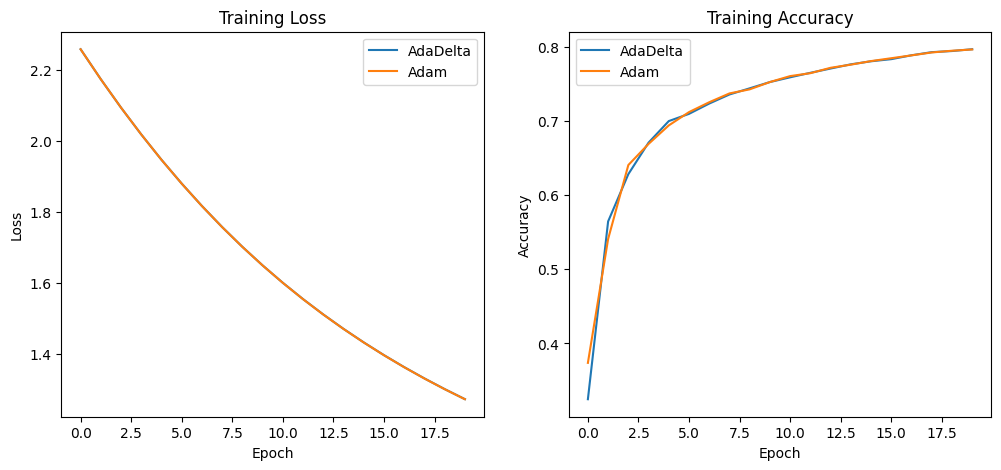

In [73]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(Adadelta_history.history['loss'], label='AdaDelta')
plt.plot(Adam_history.history['loss'], label='Adam')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Adadelta_history.history['accuracy'], label='AdaDelta')
plt.plot(Adam_history.history['accuracy'], label='Adam')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

TASK 4

In [78]:
from tensorflow.keras.optimizers import Adam
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [79]:
model = Sequential([
    Dense(50, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')])

In [80]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8061 - loss: 0.7563 - val_accuracy: 0.8917 - val_loss: 0.4465
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8885 - loss: 0.5076 - val_accuracy: 0.9021 - val_loss: 0.4665
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8837 - loss: 0.5247 - val_accuracy: 0.8767 - val_loss: 0.5782
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8830 - loss: 0.5408 - val_accuracy: 0.8765 - val_loss: 0.5806
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8811 - loss: 0.5395 - val_accuracy: 0.8975 - val_loss: 0.5869
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8764 - loss: 0.5571 - val_accuracy: 0.8703 - val_loss: 0.5648
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.5497 - val_accuracy: 0.8540 - val_loss: 0.6992
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.5565 - 

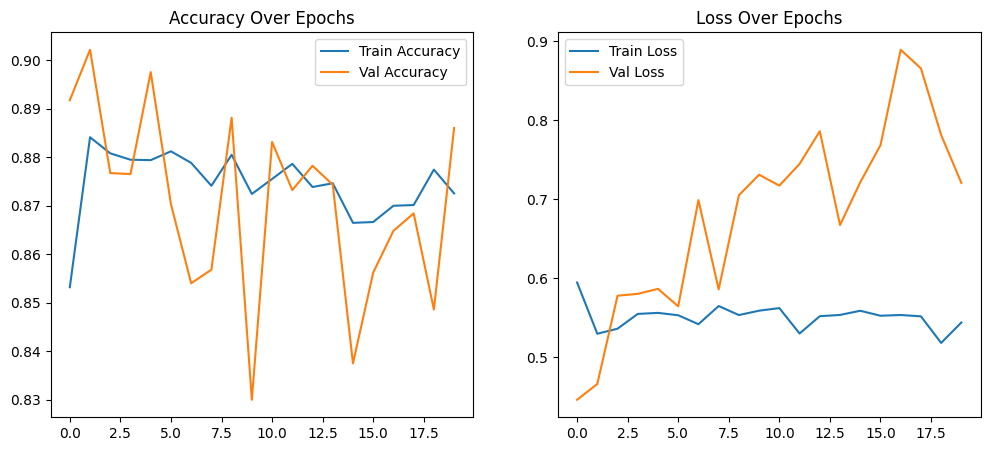

In [82]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

TASK 5

In [84]:
from tensorflow.keras.layers import Dense , Dropout

In [85]:
model = Sequential([
    Dense(50, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7406 - loss: 0.8699 - val_accuracy: 0.8126 - val_loss: 0.8128
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7255 - loss: 0.8756 - val_accuracy: 0.8224 - val_loss: 0.8266
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7332 - loss: 0.8602 - val_accuracy: 0.8360 - val_loss: 0.8515
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7317 - loss: 0.8972 - val_accuracy: 0.8266 - val_loss: 0.8473
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7317 - loss: 0.8210 - val_accuracy: 0.8219 - val_loss: 1.3638
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7466 - loss: 0.8969 - val_accuracy: 0.8522 - val_loss: 1.0077
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7402 - loss: 0.8398 - val_accuracy: 0.8040 - val_loss: 0.9807
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7309 - loss: 0.8480 - 

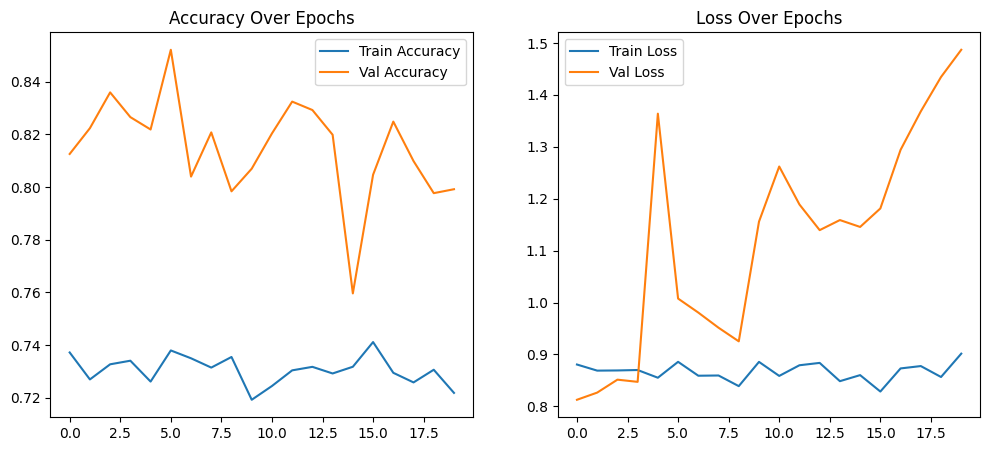

In [90]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()